In [1]:
import json
import numpy as np
import pandas as pd
from plotnine import *

## Collect metrics and holdout data generated from `train_and_predict.py`

In [2]:
# Collect metrics and holdout data generated from `train_and_predict.py`
with open('../prophet-mod-v1/eval_metrics.json') as f:
    eval_scores = json.load(f)

df = pd.read_pickle('../prophet-mod-v1/test_preds_actuals.csv')

## Model evaluation
- I made predictions over the entire set test set and saved them to `prophet-mod-v1/test_preds_actuals.csv`.
- I chose mean squared error (MSE) and mean absolute error (MAE) to evaluate this model. 
    - Technical note: With so many assumed zeroes, percentage based evaluation metrics like MAPE don't really make sense to use. AIC is calculated using a value represntsing the number of parameters in your (regerssion) model, so not so appropriate for my use here either. MSE and MSE are also nice in that they are units of your target (`chats`), which can be helpful for stakeholders. 
- The Prophet model performance (as defined by MSE and MAE) degrades from training data to test data. Further, if I do not count instances where there are zero chats in the test data, I see MSE and MAE degrade, which is to be expected. 
- **The takeaway here is that we are, on average, off by +/- ~11 chats in any given 15 minutes interval in the test data.** Is this useful?

In [3]:
pd.DataFrame(eval_scores.items(), columns=['data-metric','score'])

,data-metric,score
0,train_mse,42.590672
1,train_mae,3.609279
2,test_mse,85.786819
3,test_mae,5.559967
4,test_nonzero_mse,167.004450
5,test_nonzero_mae,10.829625


- I plot forecasted chats vs actual chats from the test data below.
- All predictions are 0 or greater.
- This model is over-estimating a bit, and doesn't seem to pick up on the drop off at the end of the year. That's something that should be improved.
- Predcitions tend to be higher in the middle of the week (Tuesday-Thrusday).

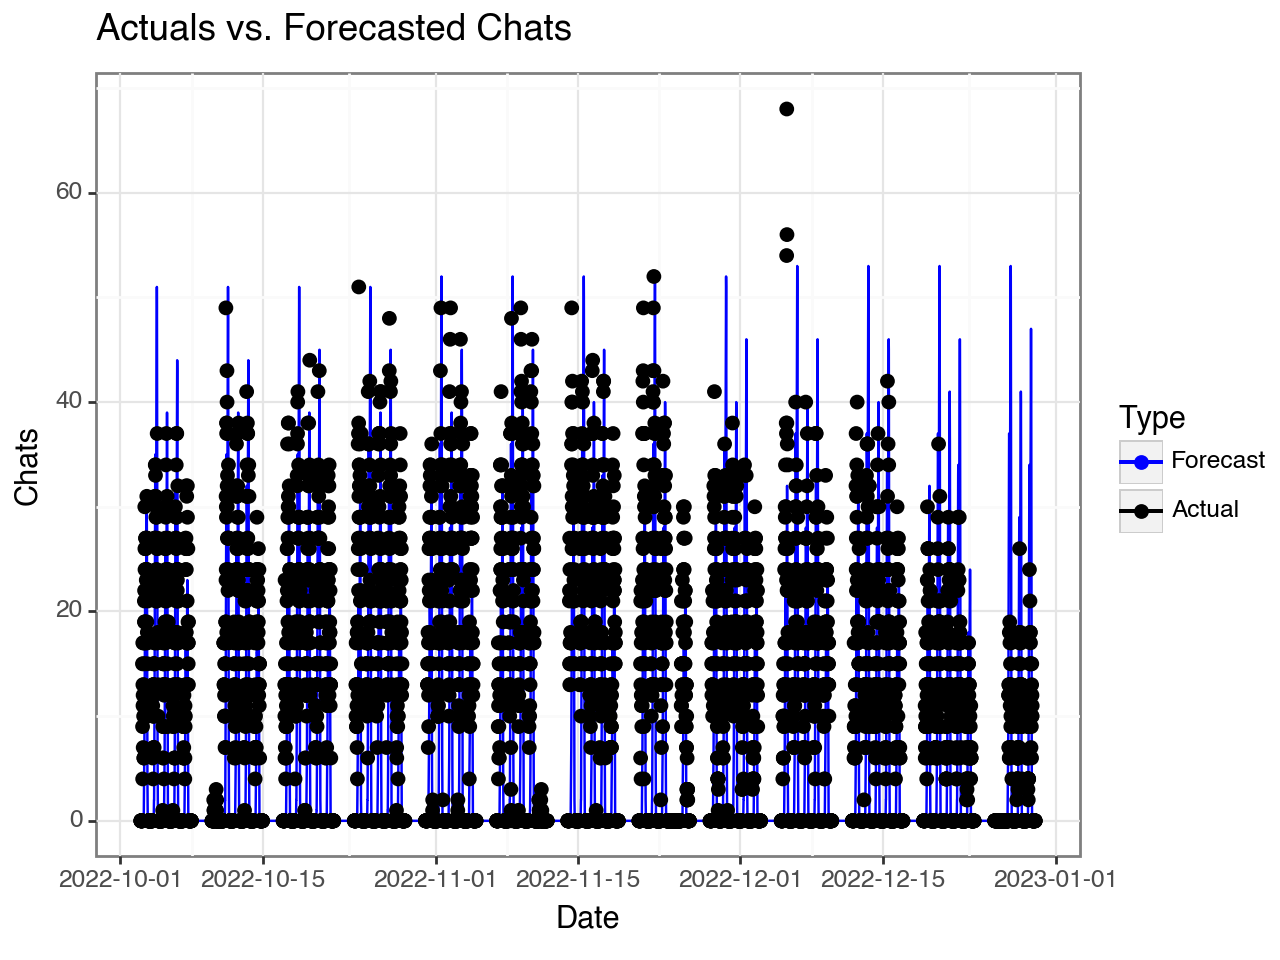

<Figure Size: (640 x 480)>

In [4]:
# Create a plot with a line for forecasts and points for actuals
(
    ggplot(df)
    + aes(x='ds')
    + geom_line(aes(y='yhat', color='"Forecast"'))  # Blue line for forecasts
    + geom_point(aes(y='y', color='"Actual"'), size=2)  # Red points for actuals
    + theme_bw()
    + labs(title='Actuals vs. Forecasted Chats', x='Date', y='Chats', color='Type')
    + scale_color_manual(values={'Forecast': 'blue', 'Actual': 'black'})
)